In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [2]:
#data downloaded from github as getting space error while fetching direct from site
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")

In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot:>

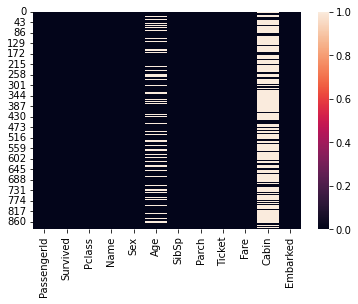

In [4]:
sns.heatmap(df.isnull())
#there are null values

In [5]:
df.isnull().sum()
# NuLL values are there for Age,Cabin and Embarked so we need to replace Age with Mean and Cabin,Embarked with Mode

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
df.describe()
#This data has outliers as difference between min to max at 25,50,75 is not standard except for passenger ID

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# Using simple imputer we will replace null values
from sklearn.impute import SimpleImputer

In [9]:
imp=SimpleImputer(strategy="most_frequent")

In [11]:
# column reference where data to be replaced
df['Cabin']=imp.fit_transform(df['Cabin'].values.reshape(-1,1))

In [12]:
df['Embarked']=imp.fit_transform(df['Embarked'].values.reshape(-1,1))

In [13]:
import numpy as np
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy='mean')
df['Age']=imp.fit_transform(df['Age'].values.reshape(-1,1))


<AxesSubplot:>

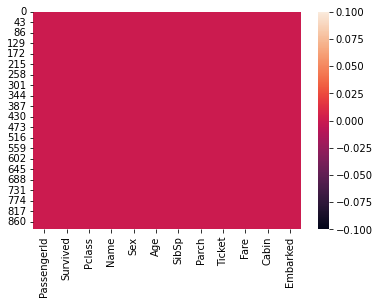

In [15]:
sns.heatmap(df.isnull())

In [14]:
df.isnull().sum()
#now we can see nothing is left as null

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [19]:
#Now we need to do encoding to change all data from string to numbers
le=LabelEncoder()
df['Name']=le.fit_transform(df['Name'])
df['Sex']=le.fit_transform(df['Sex'])
df['Ticket']=le.fit_transform(df['Ticket'])
df['Cabin']=le.fit_transform(df['Cabin'])
df['Embarked']=le.fit_transform(df['Embarked'])

In [20]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.000000,1,0,523,7.2500,47,2
1,2,1,1,190,0,38.000000,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.000000,0,0,669,7.9250,47,2
3,4,1,1,272,0,35.000000,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.000000,0,0,472,8.0500,47,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27.000000,0,0,101,13.0000,47,2
887,888,1,1,303,0,19.000000,0,0,14,30.0000,30,2
888,889,0,3,413,0,29.699118,1,2,675,23.4500,47,2
889,890,1,1,81,1,26.000000,0,0,8,30.0000,60,0


In [21]:
df.corr()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.038559,0.042939,0.033207,-0.057527,-0.001652,-0.056554,0.012658,-0.018086,0.013128
Survived,-0.005007,1.000000,-0.338481,-0.057343,-0.543351,-0.069809,-0.035322,0.081629,-0.164549,0.257307,0.175690,-0.167675
Pclass,-0.035144,-0.338481,1.000000,0.052831,0.131900,-0.331339,0.083081,0.018443,0.319869,-0.549500,-0.248495,0.162098
Name,-0.038559,-0.057343,0.052831,1.000000,0.020314,0.057466,-0.017230,-0.049105,0.047348,-0.049173,0.034129,-0.006117
Sex,0.042939,-0.543351,0.131900,0.020314,1.000000,0.084153,-0.114631,-0.245489,0.059372,-0.182333,-0.102643,0.108262
Age,0.033207,-0.069809,-0.331339,0.057466,0.084153,1.000000,-0.232625,-0.179191,-0.068848,0.091566,0.056011,-0.026749
SibSp,-0.057527,-0.035322,0.083081,-0.017230,-0.114631,-0.232625,1.000000,0.414838,0.079461,0.159651,-0.005539,0.068230
Parch,-0.001652,0.081629,0.018443,-0.049105,-0.245489,-0.179191,0.414838,1.000000,0.020003,0.216225,0.022682,0.039798
Ticket,-0.056554,-0.164549,0.319869,0.047348,0.059372,-0.068848,0.079461,0.020003,1.000000,-0.013885,-0.072200,-0.001729
Fare,0.012658,0.257307,-0.549500,-0.049173,-0.182333,0.091566,0.159651,0.216225,-0.013885,1.000000,0.090516,-0.224719


In [23]:
corr_matrix=df.corr()
type(corr_matrix)

pandas.core.frame.DataFrame

In [24]:
corr_matrix["Survived"].sort_values(ascending=False)
#Here we will drop PassengerID which has very low correlation and Ticket as this is contributing almost same as Emabarked

Survived       1.000000
Fare           0.257307
Cabin          0.175690
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Name          -0.057343
Age           -0.069809
Ticket        -0.164549
Embarked      -0.167675
Pclass        -0.338481
Sex           -0.543351
Name: Survived, dtype: float64

<AxesSubplot:>

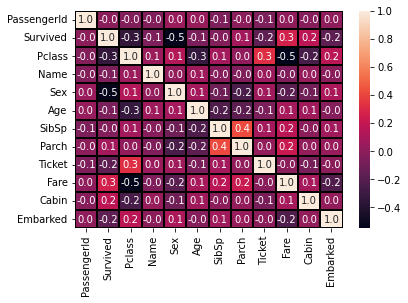

In [26]:
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.1f")


In [27]:
df1=df.drop("PassengerId",axis=1)
df1

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,108,1,22.000000,1,0,523,7.2500,47,2
1,1,1,190,0,38.000000,1,0,596,71.2833,81,0
2,1,3,353,0,26.000000,0,0,669,7.9250,47,2
3,1,1,272,0,35.000000,1,0,49,53.1000,55,2
4,0,3,15,1,35.000000,0,0,472,8.0500,47,2
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,548,1,27.000000,0,0,101,13.0000,47,2
887,1,1,303,0,19.000000,0,0,14,30.0000,30,2
888,0,3,413,0,29.699118,1,2,675,23.4500,47,2
889,1,1,81,1,26.000000,0,0,8,30.0000,60,0


In [28]:
df2=df1.drop("Ticket",axis=1)
df2

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,108,1,22.000000,1,0,7.2500,47,2
1,1,1,190,0,38.000000,1,0,71.2833,81,0
2,1,3,353,0,26.000000,0,0,7.9250,47,2
3,1,1,272,0,35.000000,1,0,53.1000,55,2
4,0,3,15,1,35.000000,0,0,8.0500,47,2
...,...,...,...,...,...,...,...,...,...,...
886,0,2,548,1,27.000000,0,0,13.0000,47,2
887,1,1,303,0,19.000000,0,0,30.0000,30,2
888,0,3,413,0,29.699118,1,2,23.4500,47,2
889,1,1,81,1,26.000000,0,0,30.0000,60,0


<function matplotlib.pyplot.show(close=None, block=None)>

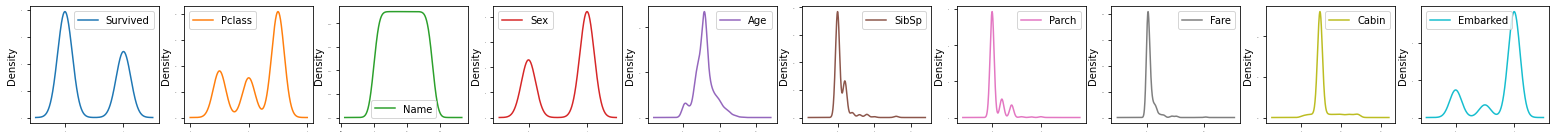

In [32]:
#Now we will check data distribution desity to find skewness
df2.plot(kind='density',subplots=True,layout=(6,11),sharex=False,legend=True,fontsize=1,figsize=(30,15))
plt.show

In [33]:
#splitting data in input and output
x=df2.drop("Survived",axis=1)
y=df2["Survived"]

In [34]:
#now to check skewness we can that and need to remove it now from the data
x.skew().sort_values(ascending=False)

Fare        4.787317
SibSp       3.695352
Parch       2.749117
Cabin       2.268926
Age         0.434488
Name        0.000000
Sex        -0.618921
Pclass     -0.630548
Embarked   -1.264823
dtype: float64

In [35]:
from sklearn.preprocessing import power_transform

In [44]:
x_new=power_transform(x)
type(x_new)

numpy.ndarray

In [45]:
sk=x.skew()

In [46]:
sk

Pclass     -0.630548
Name        0.000000
Sex        -0.618921
Age         0.434488
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Cabin       2.268926
Embarked   -1.264823
dtype: float64

In [47]:
np.abs(3)

3

In [48]:
np.abs(-3)

3

In [49]:
sk[np.abs(sk)>0.5].all()

True

In [51]:
x.skew()[np.abs(x.skew())<0.25].all()

False

Pclass         AxesSubplot(0.125,0.536818;0.0945122x0.343182)
Name        AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
Sex         AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
Age         AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
SibSp       AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
Parch       AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
Fare        AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
Cabin             AxesSubplot(0.125,0.125;0.0945122x0.343182)
Embarked       AxesSubplot(0.238415,0.125;0.0945122x0.343182)
dtype: object

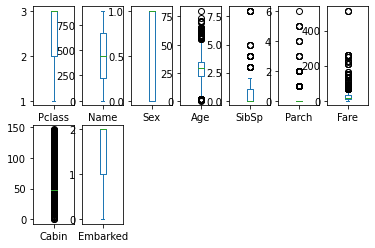

In [52]:
#now need to check outliers, we can see that we need remove outliers
x.plot(kind='box',subplots=True,layout=(2,7))

In [53]:
#Removinf outliers using Zscore
from scipy.stats import zscore
import numpy as np

In [54]:
z=np.abs(zscore(x))

In [55]:
threshold=3
print(np.where(z>3))

(array([  6,  10,  13,  16,  25,  27,  50,  59,  66,  68,  71,  75,  86,
        88,  96, 116, 118, 119, 128, 148, 159, 164, 167, 171, 180, 182,
       183, 193, 201, 205, 233, 251, 258, 261, 262, 266, 278, 299, 309,
       311, 324, 337, 339, 340, 341, 345, 360, 370, 377, 380, 386, 394,
       434, 437, 438, 438, 456, 462, 480, 493, 516, 527, 541, 542, 557,
       558, 567, 577, 585, 610, 618, 630, 638, 662, 672, 678, 679, 683,
       686, 689, 699, 700, 715, 716, 724, 730, 736, 737, 742, 745, 772,
       774, 776, 779, 787, 792, 809, 813, 824, 835, 846, 850, 851, 858,
       863, 885], dtype=int64), array([7, 7, 5, 4, 5, 6, 4, 4, 7, 4, 4, 7, 5, 6, 3, 3, 6, 4, 7, 7, 4, 4,
       5, 4, 4, 4, 7, 7, 4, 7, 4, 7, 6, 4, 7, 4, 4, 6, 7, 6, 4, 7, 7, 7,
       6, 7, 5, 7, 6, 6, 4, 7, 7, 5, 5, 6, 7, 7, 4, 3, 7, 6, 4, 4, 6, 7,
       5, 7, 7, 5, 7, 3, 5, 7, 3, 5, 6, 4, 4, 6, 7, 6, 7, 6, 7, 6, 5, 6,
       6, 3, 7, 5, 7, 6, 4, 4, 7, 4, 4, 7, 4, 4, 3, 5, 4, 5], dtype=int64))


In [56]:
x1=x[(z<3).all(axis=1)]

In [57]:
print("old dataframe",x.shape)
print("new dataframe",x1.shape)
print("total dropped",x.shape[0]-x1.shape[0])

old dataframe (891, 9)
new dataframe (786, 9)
total dropped 105


In [58]:
loss_percent=(891-786)/891*100
print(loss_percent,"%")
#here not removing outliers as they are required to be considered 

11.784511784511785 %


In [65]:
#VIF below shows closeness in Sibsp and Parch , so we can drop Parch
def calc_vif(x):
    vif=pd.DataFrame()
    vif["Variables"]=x.columns
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x1.shape[1])]
   
    return(vif)
calc_vif(x)

,Variables,VIF Factor
0,Pclass,6.862849
1,Name,3.913401
2,Sex,3.085451
3,Age,5.512550
4,SibSp,1.571253
5,Parch,1.619458
6,Fare,1.791610
7,Cabin,5.184210
8,Embarked,4.873212


In [66]:
x1=x.drop("Parch",axis=1)
x1

,Pclass,Name,Sex,Age,SibSp,Fare,Cabin,Embarked
0,3,108,1,22.000000,1,7.2500,47,2
1,1,190,0,38.000000,1,71.2833,81,0
2,3,353,0,26.000000,0,7.9250,47,2
3,1,272,0,35.000000,1,53.1000,55,2
4,3,15,1,35.000000,0,8.0500,47,2
...,...,...,...,...,...,...,...,...
886,2,548,1,27.000000,0,13.0000,47,2
887,1,303,0,19.000000,0,30.0000,30,2
888,3,413,0,29.699118,1,23.4500,47,2
889,1,81,1,26.000000,0,30.0000,60,0


In [70]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import r2_score,accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [72]:
#finding best random state
maxAccu=0
maxRS=0
for i in range(0,100):
    x1_train,x1_test,y_train,y_test=train_test_split(x1,y,test_size=.20,random_state=i)
    lr.fit(x1_train,y_train)
    predlr=lr.predict(x1_test)
    acc=accuracy_score(y_test,predlr)
    print('accuracy',acc,'random state',i)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        print("Best accuracy is",maxAccu,"on Random state",maxRS)
    


accuracy 0.7821229050279329 random state 0
Best accuracy is 0.7821229050279329 on Random state 0
accuracy 0.7932960893854749 random state 1
Best accuracy is 0.7932960893854749 on Random state 1
accuracy 0.7597765363128491 random state 2
accuracy 0.7486033519553073 random state 3
accuracy 0.8379888268156425 random state 4
Best accuracy is 0.8379888268156425 on Random state 4
accuracy 0.8156424581005587 random state 5
accuracy 0.8324022346368715 random state 6
accuracy 0.7653631284916201 random state 7
accuracy 0.7374301675977654 random state 8
accuracy 0.770949720670391 random state 9
accuracy 0.8212290502793296 random state 10
accuracy 0.8212290502793296 random state 11
accuracy 0.7988826815642458 random state 12
accuracy 0.8100558659217877 random state 13
accuracy 0.7988826815642458 random state 14
accuracy 0.7988826815642458 random state 15
accuracy 0.7486033519553073 random state 16
accuracy 0.7821229050279329 random state 17
accuracy 0.8324022346368715 random state 18
accuracy 0.83

In [74]:
#We will go with random state 20
x1_train,x1_test,y_train,y_test=train_test_split(x1,y,test_size=0.2,random_state=20)
lr.fit(x1_train,y_train)
predlr=lr.predict(x1_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))


0.8435754189944135
[[102  10]
 [ 18  49]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       112
           1       0.83      0.73      0.78        67

    accuracy                           0.84       179
   macro avg       0.84      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179



In [76]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(lr,x1,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.7889837423890528

In [111]:
#Trying with other models to see if we can get better score
from sklearn.svm import SVC
svc=SVC(kernel='linear')
svc.fit(x1_train,y_train)
svc.score(x1_train,y_train)
predsvc=svc.predict(x1_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))


0.8435754189944135
[[104   8]
 [ 20  47]]
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       112
           1       0.85      0.70      0.77        67

    accuracy                           0.84       179
   macro avg       0.85      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179



In [78]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(svc,x1,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.7912309334002887

In [84]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x1_train,y_train)
preddt=dt.predict(x1_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.776536312849162
[[94 18]
 [22 45]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       112
           1       0.71      0.67      0.69        67

    accuracy                           0.78       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.78      0.78       179



In [85]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(dt,x1,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.7654510074697132

In [86]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x1_train,y_train)
predrf=rf.predict(x1_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8100558659217877
[[100  12]
 [ 22  45]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       112
           1       0.79      0.67      0.73        67

    accuracy                           0.81       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.81      0.81      0.81       179



In [99]:
#from above svc has best results and cross validation score so now will apply hypertuning
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
svc=SVC()
parameters={'gamma':[0.01, 0.1, 1, 10, 100]}
gcv=GridSearchCV(svc,parameters)
gcv.fit(x1_train,y_train)
gcv.best_params_
        

{'gamma': 0.1}

In [102]:
gcv_pred=gcv.best_estimator_.predict(x1_test)
accuracy_score(y_test,gcv_pred)

0.5921787709497207

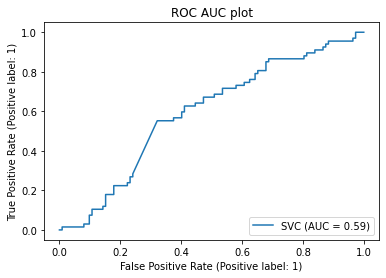

In [105]:
#ROC AUC Curve
from sklearn.metrics import plot_roc_curve
plot_roc_curve(gcv.best_estimator_,x1_test,y_test)
plt.title("ROC AUC plot")
plt.show()

In [108]:
#above does not gives better % accuracy so we will choose svc model
import pickle

In [112]:
filename='titan.pkl'
pickle.dump(svc,open(filename,'wb'))

In [113]:
#Conclusion
loaded_model=pickle.load(open('titan.pkl','rb'))
result=loaded_model.score(x1_test,y_test)
print(result)
                        

0.8435754189944135


In [114]:
#not working for me ,need help
conclusion=pd.DataFrame([loaded_model.predict(x1_test)[:],predsvc[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,169,170,171,172,173,174,175,176,177,178
Predicted,1,0,0,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0
Original,1,0,0,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0


In [ ]:
#above svc model gives better accuracy and results as well as cross val score than other tested , the output is Binary hence used Logistic Rgression approach
